In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from tensorflow import keras
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import os
import glob
from keras.preprocessing import image

In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [3]:
#specify which GPU to use (only available to those that have access to multiple GPUs)
# gpu_options = tf.GPUOptions(visible_device_list="0")
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # Visible devices must be set at program startup
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [ ]:
# config = tf.ConfigProto()
# config.gpu_options.visible_device_list = "0,1"
# if tf.test.gpu_device_name(): 
#     print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
# else:
#    print("Please install GPU version of TF")

In [4]:
#load model (if load failed with OOM error (out of gpu memory), specify diff GPU above or close other sessions to free up gpu mem)
# It can be used to reconstruct the model identically.
model = keras.models.load_model("/raid/arnold/clouds_detection/model/custom_cloud_classification/")
# model = keras.models.load_model("/raid/arnold/clouds_detection/models/custom_cloud_classification_augmented_3_sites")

(1, 7)
5
This image most likely belongs to scattered with a 99.99 percent confidence.


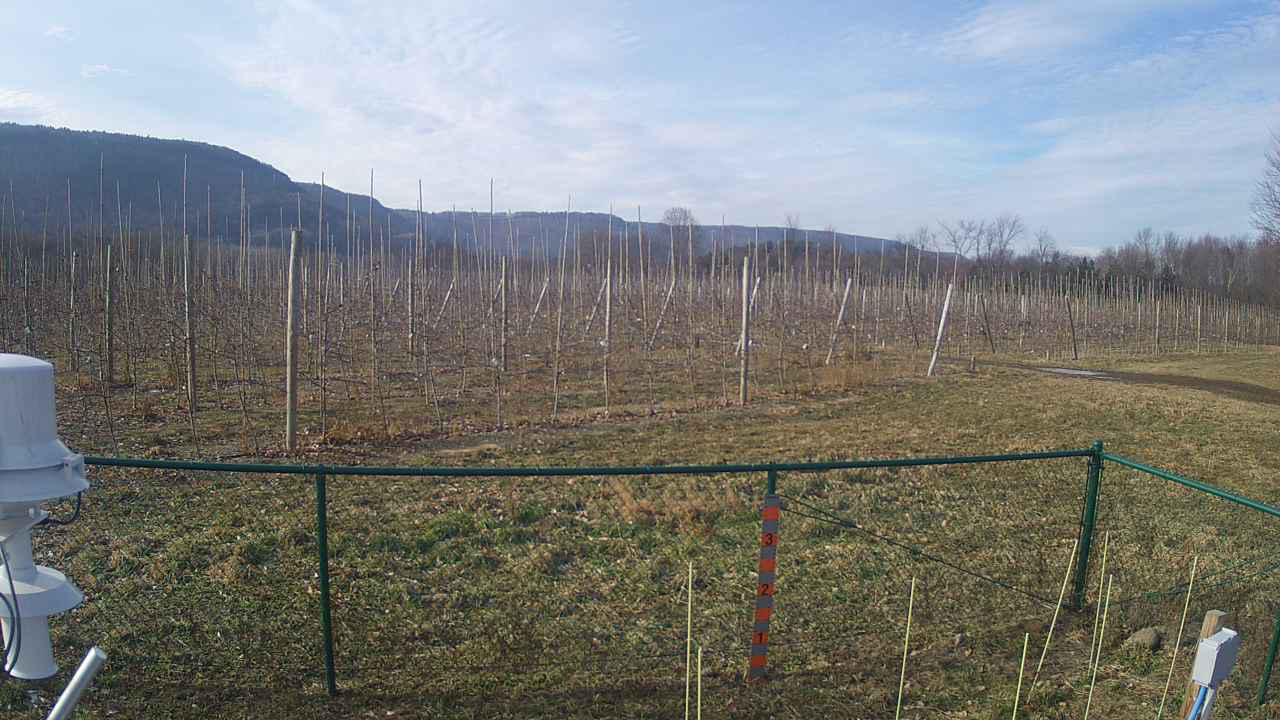

In [5]:
batch_size = 32
img_height = 720
img_width = 1280 # orignal 1280 but can switch to 1080
class_names = ['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
new_img_path = '/raid/mesonet/cam_photos/2018/12/20/VOOR/20181220T175030_VOOR.jpg'
# new_img_path = '/raid/NYSM/archive/nysm/cam_photos/latest/WGAT.jpg'

img = keras.preprocessing.image.load_img(
    new_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
# print(img_array.shape)
# print(img_array)
predictions = model.predict(img_array)
print(predictions.shape)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
Image.open(new_img_path)

126
['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
[2 2 4 6 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 6 6 2]


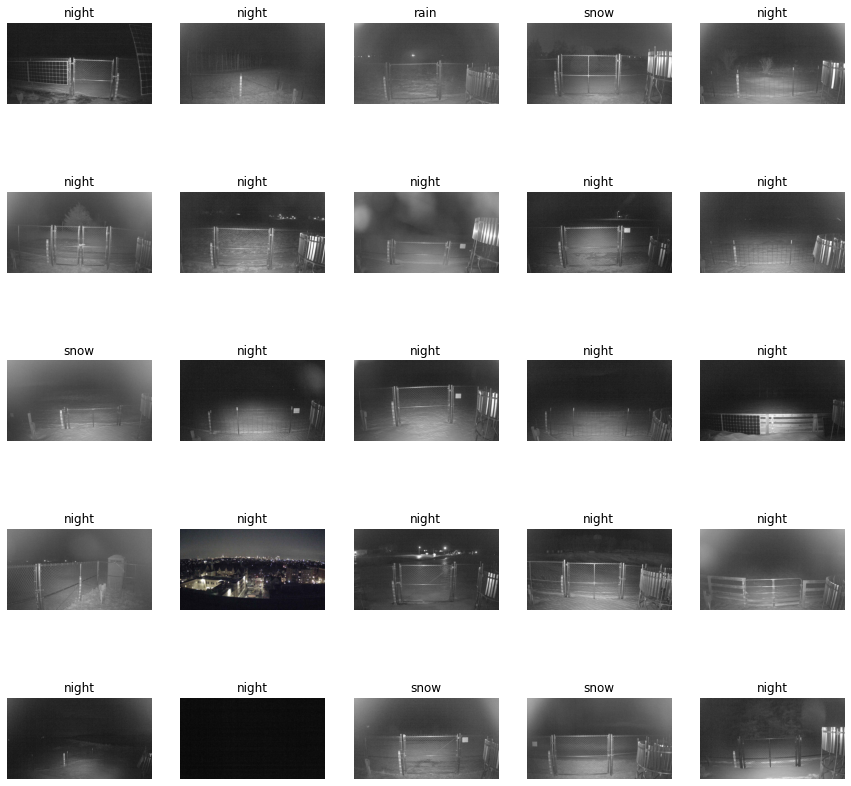

In [6]:

listOfFiles = glob.glob('/raid/NYSM/archive/nysm/cam_photos/latest/*')
print(len(listOfFiles))
# load all images into a list
# load all images into a list
paths_all = []
images_all = []
for img in listOfFiles[:25]:
#     img = os.path.join(folder_path, img)
#     print(img)
    paths_all.append(img)
    img = image.load_img(img, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_all.append(img)
# print(images_all[1])    
images_all = np.vstack(images_all)

#model.predict_claasses still works but is deprecated
# classes = model.predict_classes(images_all, batch_size=64)
classes = np.argmax(model.predict(images_all), axis=-1)
test_classes = np.argmax(model.predict(images_all), axis=-1)
print(class_names)
print(classes)
#plot 
plt.figure(figsize=(15, 15))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images_all[i].astype("uint8"))
#     predictions = model.predict(image[i])
#     score = tf.nn.softmax(predictions[0])
#     plt.title(class_names[np.argmax(score)], 100 * np.max(score))
    plt.title(class_names[classes[i]])
    plt.axis("off")

In [ ]:
#uncomment full cell to see other ways to use model for making predictions 
# new_img_path = '/raid/NYSM/archive/nysm/cam_photos/latest/WGAT.jpg'
# #way 1
# # img = keras.preprocessing.image.load_img(
# #     new_img_path, target_size=(720, 1280)
# # )
# #way 2
# #img = Image.open(new_img_path)

# #way 3
# img = image.load_img(new_img_path, target_size=(720, 1280))
# img = image.img_to_array(img)

# first = np.expand_dims(img, axis=0)
# print(first.shape)
# result = model.predict(first)

# predicted_class = np.argmax(result[0], axis=-1)
# # score1 = tf.nn.softmax(result[0])
# print('class ',predicted_class)
# print(class_names[predicted_class])
# # print(
# #     "Using numpy image most likely belongs to {} with a {:.2f} percent confidence."
# #     .format(class_names[np.argmax(score1)], 100 * np.max(score1))
# # )
# print("***********")

# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# print(img_array.shape)
# predictions2 = model.predict(img_array)
# print(predictions2.shape)
# score2 = tf.nn.softmax(predictions2[0])

# print(np.argmax(score2))
# print(
#     "Using tensor array image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score2)], 100 * np.max(score2))
# )

In [7]:
model = ''
model = keras.models.load_model("/raid/arnold/clouds_detection/models/custom_cloud_classification_augmented_3_sites")

In [8]:
#this will select all the file names and put them in a list (from all sub dirs)
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles    




In [11]:
# import glob
class_names = ['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']

#swap list of files for paths to be correct
listOfFiles = glob.glob('/raid/NYSM/archive/nysm/cam_photos/2021/05/31/VOOR/*.jpg')
# listOfFiles = glob.glob('/raid/NYSM/archive/nysm/cam_photos/latest/*')
print(len(listOfFiles))


219


['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
[5 3 2 3 5 5 5 2 3 3 5 2 2 4 2 5 3 3 5 3 5 5 5 5 4 4 4 4 3 4 5 5 4 5 5 4 5
 4 5 5 5 5 2 3 5 5 5 5 2 5 2 2 4 5 4 5 5 5 3 5 5 4 2 6 4 5 2 4 5 5 5 5 2 5
 4 3 4 5 2 5 5 6 2 5 5 5 5 5 5 5 4 5 5 5 4 2 4 4 5 5 5 5 5 5 5 2 2 5 5 4 3
 5 3 5 5 5 3 3 6 4 2 5 5 3 3 5 5 5 5 4 3 5 4 5 5 4 2 5 5 5 5 6 5 5 5 2 5 4
 5 5 5 5 4 5 4 4 5 4 5 5 5 5 5 5 5 2 5 4 5 5 5 4 5 3 5 5 3 2 3 5 3 5 3 5 5
 5 5 5 5 5 2 6 6 2 4 5 4 3 5 2 4 4 5 5 5 5 2 4 6 5 3 3 6 3 5 5 5 4 5]
219
20210531T002538_VOOR.jpg
20210531T190040_VOOR.jpg
20210531T012537_VOOR.jpg
20210531T092538_VOOR.jpg
20210531T153539_VOOR.jpg
20210531T210039_VOOR.jpg
20210531T201540_VOOR.jpg
20210531T012036_VOOR.jpg
20210531T183040_VOOR.jpg
20210531T190540_VOOR.jpg
20210531T222042_VOOR.jpg
20210531T014035_VOOR.jpg
20210531T010037_VOOR.jpg
/raid/arnold/clouds_detection/img_save/rain/20210531T154540_VOOR.jpg
20210531T020037_VOOR.jpg
20210531T202040_VOOR.jpg
20210531T165540_VOOR.jpg
20210531T094538

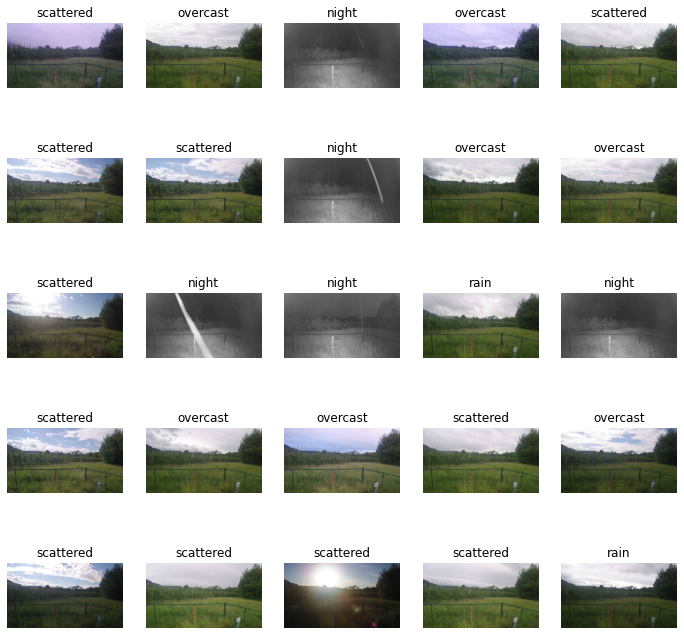

In [12]:
# load all images into a list
paths_all = []
images_all = []
for img in listOfFiles:
#     img = os.path.join(folder_path, img)
#     print(img)
    paths_all.append(img)
    img = image.load_img(img, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_all.append(img)
# print(images_all[1])    
images_all = np.vstack(images_all)

#model.predict_claasses still works but is deprecated
# classes = model.predict_classes(images_all, batch_size=64)
classes = np.argmax(model.predict(images_all), axis=-1)
print(class_names)
print(classes)

plt.figure(figsize=(12, 12))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images_all[i].astype("uint8"))
#     predictions = model.predict(image[i])
#     score = tf.nn.softmax(predictions[0])
#     plt.title(class_names[np.argmax(score)], 100 * np.max(score))
    plt.title(class_names[classes[i]])
    plt.axis("off")

#save predicted images to folders
#['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
print(len(classes))

save_path = '/raid/arnold/clouds_detection/img_save/'

r =0
for k,i in enumerate(classes):
    if i==0:
        #save image
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])
    elif i==1:
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])
    elif i==2:
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])
    elif i==3:
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])    
    elif i==4:
        print(save_path+class_names[i]+'/'+paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])
    elif i==5:
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])
    elif i==6:
        print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save(save_path+class_names[i]+'/'+paths_all[k][-24:])